### <center> <span style='font-style=sans-serif; color:red; font-size:1.3em'> AllLife Bank Customer Segmentation - Project - VI
    
<center>  by    
    
<center> <span style='color:blue'> Malathi Narayanan

## <span style='color:green'> Data Discription

        
    
 <font color=blue>
     
Data: AllLife Bank -Customer data


1. Sl_No: Primary key of the records
2. Customer Key: Customer identification number
3. Average Credit Limit: Average credit limit of each customer for all credit cards
4. Total credit cards: Total number of credit cards possessed by the customer
5. Total visits bank: Total number of visits that customer made (yearly) personally to the bank
6. Total visits online: Total number of visits or online logins made by the customer (yearly)
7. Total calls made: Total number of calls made by the customer to the bank or its customer          service department (yearly)

## <span style='color:green'> Problem Definition
    
 <font color=blue>

To understand and prepare the data and build a classification model which can predict the customers going to renounce their credit cards. To minimize the loss of opportunity, the model is tuned to maximize the 'Recall' performance metrics and optimize the model using appropriate techniques to have Recall > 0.95, precision and accuracy  > 0.70. Develop and perform the preprocessing to deal the missing values, ouliers and skewed variables. Develop the profile of customers going to churn. Also to explore the interaction and correlation of different variables to the target to be predicted.

## <span style='color:green'> Questions to be Answered
    
  <font color=blue>
   
- Are there any missing, duplicate values?
- Any outliers skewed variables?
- How to treat missing values, outliers and skewed variables?
- Is the data ready for analysis?
- All the columns are important to keep?
- How to optimize and evaluate the developed model?
- key factors influencing the the customers going to churn.
- Are there any recommendations for the business?

## <span style='color:green'> Objective


<font color=blue>
      
      
- To predict whether a customer is going to renounce their credit card or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.      
      
- Understanding the data contents and the background
- Statistical analysis of the data.
- Performing Univariate, Bivariate and multivariate analysis of the variables
- Preparing data for Analysis and Modeling
- Data preprocesing- Missing value treatment, Feature selection, outlier treatment, normalization

- To obtain a model which gives the performance criteria on the test set:  Recall > 0.95, precision and accuracy  > 0.70.
- Providing insights and recommendations for the business

## <span style='color:green'> Approach
    
<font color=blue>
    
 Step 1: Understanding the Data background and contents
    
 Step 2: EDA Statistics
    
         Step 2a: EDA-Statistics - Summary
    
 Step 3: Data Visualization & Summary
    
         Step 3a: Data Visualization - Summary
    
 Step 4: Data Preparation

 Step 5: K-Means Clustering

 Step 6: Hierarchical Clustering
       
 Step 7: K-Means Vs Hierarchical Clustering
    
 Step 8 : Observations & Conclusions
  
 Appendix : Clustering with Outlier Treatments

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set()
sns.set(color_codes=True)
sns.set_style("darkgrid")

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to scale the data using z-score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", None)

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## <span style='color:red'> Step 1: Understanding the Data background and contents:

In [2]:
df= pd.read_excel('Credit Card Customer Data.xlsx')
dfx=df.copy()
df1=df.copy()
df1.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df1.shape

<font color=blue>

- There are 7 variables with 660 entries. All are numerical values.

In [ ]:
df1.info()

In [ ]:
df1.isnull().sum()

In [ ]:
df1.duplicated().sum()

<font color=blue>

- There are no missing or duplicated variables. All the variables are int type.

In [ ]:
df1.describe().T

<font color=blue>

- Sl.No has unique values starting from 1 to 660. This can be dropped.
- Avg_Credit_Limit range is from 3000 to 200000. Average is 34574.24.
- Avg_Credit_Limit, Total_visits_online and Total_calls_made are right skewed.
- Maximum Total_visits_bank is 5, Total_visits_online is 15 and Total_calls_made is 10. 

In [ ]:
df1.nunique()

<font color=blue>

- There are 655 unique Customer Key values. It means 5 Key values are repeating. Lets view them. 

In [ ]:
x=df1[df1['Customer Key'].duplicated(keep=False)].sort_values(['Customer Key'])
x

<font color=blue>

- The duplicated Customer Key represents different data points. Considering them as two different customer detail, the duplicated rows are left as such.
- The Customer Key column is dropped as it doesnt hold any information. The Sl_No column is also dropped.

In [3]:
df1.drop("Sl_No", axis=1, inplace=True)
df1.drop("Customer Key", axis=1, inplace=True)
df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
df1.shape

## <span style='color:red'> Step 2: EDA-Statistics

In [ ]:
df1.describe().T

In [ ]:
df1.nunique()

In [ ]:
cate_var=['Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for i in cate_var:
    print(df1[i].value_counts())
    print('Null:', df1[i].isnull().sum())
    print('_'*30)

<font color=blue>

- Amoung 660 entries, more than 100 people are holding 4, 6 or 7 credit cards.
- Majority 158 customers visited bank twice and 100 didnt visit bank at all.
- Majority of customers visited online 1 to 5 times. Remaining seemed to be outliers.
- Most of the people made call 1 to 4 times.

In [ ]:
df1.corr()

<font color=blue>

- Total_visits_bank is negatively correlated with Total_visits_online, Total_calls_made and Avg_Credit_Limit. 
- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online.
- Total_Credit_Cards is positively correlated with Avg_Credit_Limit, Total_visits_bank and Total_visits_online.
- Total_calls_made and Total_Credit_Cards correlation is -0.65.
- Total_Credit_Cards and Avg_Credit_Limit are positively correlated and the value is 0.60.
- Total_visits_online and Avg_Credit_Limit correlation is 0.551385.
- Total_visits_bank and Total_visits_online correlation is -0.551861.

In [ ]:
df.groupby(['Total_Credit_Cards'])[['Avg_Credit_Limit']].agg(['count', 'mean', 'min', 'max'])

<font color=blue>

- Avg_Credit_Limit is increasing with Total_Credit_Cards.
- The majority of people hold 4,6 or 7 credit cards.
- 19 customers are having 10 credit cards and their maximum Avg_Credit_Limit is 200000.
- Minimum Avg_Credit_Limit is 3000 by 4 Total_Credit_Cards	holders.

In [ ]:
df.groupby(['Total_Credit_Cards'])[['Total_visits_bank', 'Total_visits_online','Total_calls_made']].agg(['count', 'mean',  'min', 'max'])

<font color=blue>

- Total_Credit_Cards 4,5,6 or 7 holders are the major contributing customers 
   and the most bank visited, the least online visited and total call made - medium no of times.
- Higher Total_Credit_Cards holders did least visit to the bank, highest online visiters and they    have low - Total_calls_made.
- The less number of credit card holders are the medium contributors have done maximum calls.

In [ ]:
df.groupby(['Total_visits_bank', 'Total_visits_online'])[['Avg_Credit_Limit']].agg(['count', 'mean',  'min', 'max'])

In [ ]:
df.groupby(['Total_calls_made'])[['Avg_Credit_Limit']].agg(['count', 'mean',  'min', 'max'])

<font color=blue>

- Customers who did higher number of bank visit, did lower number of online visit.
- Lower Total_calls_made customers have higher Avg_Credit_Limit

## <span style='color:red'> Step 2a: EDA-Statistics - Summary

<font color=blue>

- There are 7 variables with 660 entries. All are numerical values.
- Sl.No has unique values starting from 1 to 660. This can be dropped.
- Avg_Credit_Limit range is from 3000 to 200000. Average is 34574.24.
- Avg_Credit_Limit, Total_visits_online and Total_calls_made are right skewed.
- Maximum Total_visits_bank is 5, Total_visits_online is 15 and Total_calls_made is 10.
- Amoung 660 entries, more than 100 people are holding 4, 6 or 7 credit cards.
- Majority 158 customers visited bank twice and 100 didnt visit bank at all.
- Majority of customers visited online 1 to 5 times. Remaining seemed to be outliers.
- Most of the people made call 1 to 4 times.
    
    
- Total_visits_bank is negatively correlated with Total_visits_online, Total_calls_made and         Avg_Credit_Limit.
- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online.
- Total_Credit_Cards is positively correlated with Avg_Credit_Limit, Total_visits_bank and         Total_visits_online.
    
    
- Avg_Credit_Limit is increasing with Total_Credit_Cards.
- The majority of people hold 4,6 or 7 credit cards.
- 19 customers are having 10 credit cards and their maximum Avg_Credit_Limit is 200000.
- Minimum Avg_Credit_Limit is 3000 by 4 Total_Credit_Cards holders.
    

- Total_Credit_Cards 4,5,6 or 7 holders are the major contributing customers and the most bank     visited, the least online visited and total call made - medium no of times.
- Higher Total_Credit_Cards holders did least visit to the bank, highest online visiters and they   have low - Total_calls_made.
- The less number of credit card holders are the medium contributors have done maximum calls.    

## <span style='color:red'> Step 3: Data Visualization 

#### ** Univariate Distribution Plots **

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 5), kde=False):
    plt.figure(figsize =(8,5));
    plt.suptitle(feature, fontsize=15, fontweight='bold');
    plt.subplot(2,1,1);sns.boxplot(data=data, x=feature, showmeans=True, color="cyan"); 
    plt.subplot(2,1,2);sns.histplot(data=data, x=feature, kde=kde,  color="indigo");
    plt.axvline(data[feature].mean(), color="red", linestyle="--");
    plt.axvline(data[feature].median(), color="cyan", linestyle="-")

In [ ]:
numVar=['Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
for i in range(len(numVar)):
    histogram_boxplot(df1, numVar[i])
    plt.show()

<font color=blue>

- Avg_Credit_Limit, Total_visits_online, Total_calls_made are right skewed.
- Avg_Credit_Limit and Total_visits_online are having outliers.
- Major contributers are customers holding 4, 6, or 7 credit card holders.

#### ** Univariate count Plots **

In [ ]:
def labeled_barplot(data, feature):
    ax = sns.countplot(data=data, x=feature, palette="bright")
    plt.xticks(rotation=90, fontsize=15) 
    
    for p in ax.patches:  
        label = "{:.1f}%".format(100 * p.get_height() / len(data[feature]))        
        x = p.get_x() + p.get_width() / 2 
        y = p.get_height()  

        ax.annotate( label,(x, y), ha="center", va="center", size=12, xytext=(0, 5),
            textcoords="offset points" ) 

In [ ]:
cate_var1=['Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
for i in range(len(cate_var1)):
    labeled_barplot(df1, cate_var1[i])
    plt.show()

<font color=blue>

- Total credit card 4,5,6 and 7 are the major contributors.
- Most of the customers visited bank twice.
- Less number of people making use of online facility.
- Most of the customers making less calls.

#### ** Bivariate Plots **

<Figure size 1080x1080 with 0 Axes>

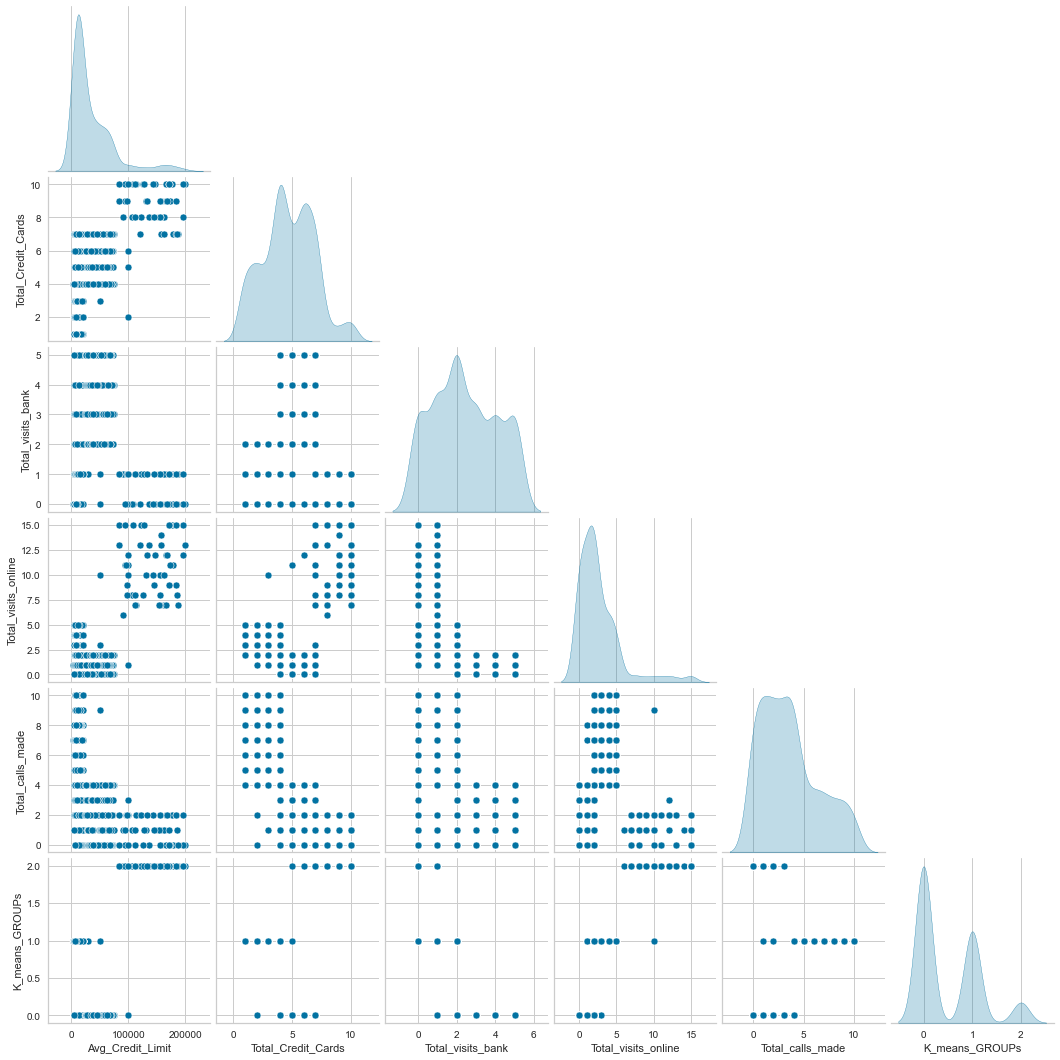

In [60]:
plt.figure(figsize =(15,15));
sns.pairplot(data=df1, diag_kind="kde", corner=True)
plt.show()

<font color=blue>

- From the pair plot, the peaks show there must be atleast 3 clusters. 
- Total_Credit_Cards and Avg-Credit_Limit are positively correlated.
- Total_visits_online and ATotal_Credit_Cards are positively correlated.

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="magma_r")
plt.show()

<font color=blue>

- Total_visits_bank is negatively correlated with Total_visits_online, Total_calls_made and         Avg_Credit_Limit.
- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online.
- Total_Credit_Cards is positively correlated with Avg_Credit_Limit, Total_visits_bank and         Total_visits_online.

<AxesSubplot:xlabel='Total_calls_made', ylabel='Avg_Credit_Limit'>

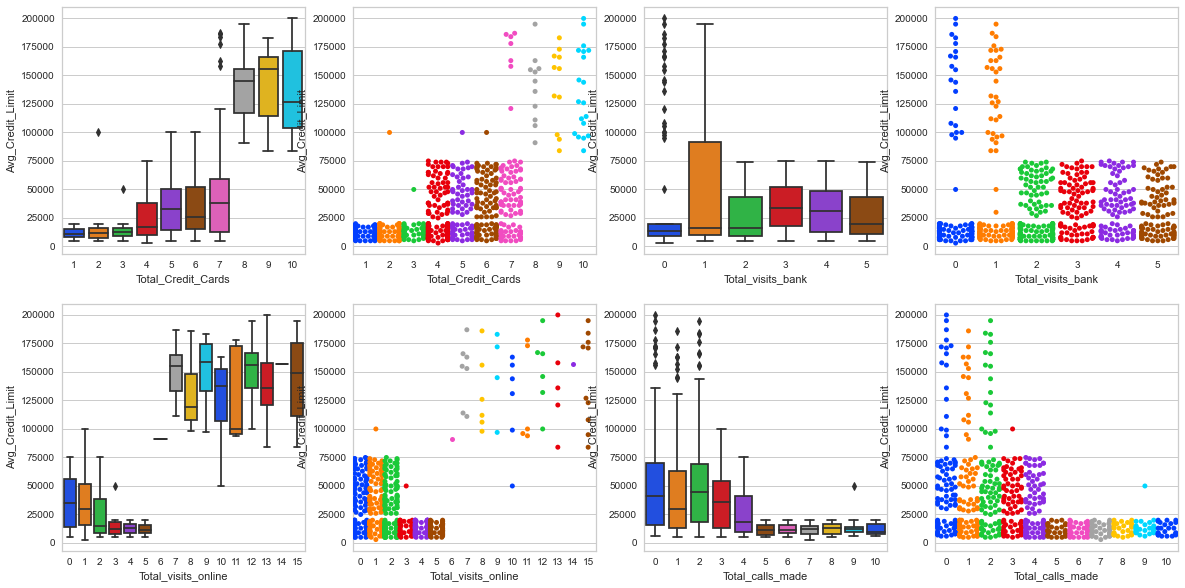

In [61]:
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1);sns.boxplot(y='Avg_Credit_Limit', x='Total_Credit_Cards', data=df, palette='bright')
plt.subplot(2,4,2);sns.swarmplot( data=df1, x='Total_Credit_Cards', y='Avg_Credit_Limit',  palette='bright')
plt.subplot(2,4,3);sns.boxplot(y='Avg_Credit_Limit', x='Total_visits_bank', data=df, palette='bright')
plt.subplot(2,4,4);sns.swarmplot( data=df1, x='Total_visits_bank', y='Avg_Credit_Limit',  palette='bright')
plt.subplot(2,4,5);sns.boxplot(y='Avg_Credit_Limit', x='Total_visits_online', data=df, palette='bright')
plt.subplot(2,4,6);sns.swarmplot( data=df1, x='Total_visits_online', y='Avg_Credit_Limit',  palette='bright')
plt.subplot(2,4,7);sns.boxplot(y='Avg_Credit_Limit', x='Total_calls_made', data=df, palette='bright')
plt.subplot(2,4,8);sns.swarmplot( data=df1, x='Total_calls_made', y='Avg_Credit_Limit',  palette='bright')

<font color=blue>

- Less number of customers hold higher number of credit cards and having higher Avg_Credit_Limit.
- Avg credit limit and Total visits made are having less dependancy on each other.
- Higher number of Total_visits_online customers set high Avg credit limit.
- Higher Avg credit limit customers made lesser total calls.

#### ** Multivariate Plots **

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1);sns.lineplot(data=df1, x="Total_calls_made", y="Avg_Credit_Limit", hue="Total_Credit_Cards", err_style="bars", ci=20, palette='bright')
plt.subplot(1,3,2);sns.lineplot(data=df1, x="Total_visits_bank", y="Avg_Credit_Limit", hue="Total_Credit_Cards", err_style="bars", ci=20, palette='bright')
plt.subplot(1,3,3);sns.lineplot(data=df1, x="Total_visits_online", y="Avg_Credit_Limit", hue="Total_Credit_Cards", err_style="bars", ci=20, palette='bright')

<font color=blue>

- Avg_Credit_Limit is high for higher Total_Credit_Cards 8,9 and 10 and lower calls made, lower total bank visits and higher online visit.

In [ ]:
def threeD_plot(feature1, feature2, color):
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure()
    ax=fig.add_subplot(111, projection='3d')
    ax.scatter(df1[feature1],df1["Avg_Credit_Limit"],df1[feature2], c=color, marker='x')
    ax.set_xlabel(feature1)
    ax.set_ylabel('Avg_Credit_Limit')
    ax.set_zlabel(feature2)
    plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
threeD_plot('Total_visits_online','Total_visits_bank','r' );plt.show()
threeD_plot('Total_calls_made','Total_Credit_Cards','g' );plt.show()
threeD_plot('Total_visits_online','Total_Credit_Cards','b' );plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
threeD_plot('Total_Credit_Cards','Total_visits_bank','m' );plt.show()
threeD_plot('Total_calls_made','Total_visits_online', 'y');plt.show()
threeD_plot('Total_visits_bank','Total_calls_made', 'violet');plt.show()

<font color=blue>

- From the 3D plots of all possible combination its very evitable that there must be 3 clusters.

### <span style='color:red'> Step 3a:  EDA Summay from Visualization

<font color=blue>

- Avg_Credit_Limit, Total_visits_online, Total_calls_made are right skewed.
- Avg_Credit_Limit and Total_visits_online are having outliers.    
- Total credit card 4,5,6 and 7 are the major contributors.
- Most of the customers visited bank twice.
- Less number of people making use of online facility. Most of the customers making less calls.
    
    
- From the pair plot, the peaks show there must be atleast 3 clusters.
- Total_visits_bank is negatively correlated with Total_visits_online, Total_calls_made and         Avg_Credit_Limit.
- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online.
- Total_Credit_Cards is positively correlated with Avg_Credit_Limit, Total_visits_bank and         Total_visits_online.
    
    
- Less number of customers hold higher number of credit cards and having higher Avg_Credit_Limit.
- Higher number of Total_visits_online customers set high Avg credit limit.
- Higher Avg credit limit customers made lesser total calls. 
- Avg_Credit_Limit is high for higher Total_Credit_Cards 8,9 and 10 and lower calls made, lower     total bank visits and higher online visit.   

    
From the the pair plot and 3D plots and of all possible combination its very evitable that there must be 3 clusters.

## <span style='color:red'> Step 4: Data Preparation

In [ ]:
df1.sample(10)

## Outlier Treatment

In [ ]:
def findoutliers(Vname):
    quartl = np.quantile(df1[Vname], [.25, .75])
    v_4iqr = 4 * (quartl[1] - quartl[0])
    print(f'Q1 = {quartl[0]}, Q3 = {quartl[1]}, 4*IQR = {v_4iqr}')
    outliers = df1.loc[np.abs(df1[Vname] - df1[Vname].median()) > v_4iqr, Vname]
    return outliers

In [ ]:
findoutliers('Avg_Credit_Limit')

In [ ]:
df1[df1["Avg_Credit_Limit"] > 152000.0]

<font color=blue>

- Credit limit from 152000 to 200000 are the outliers while the customers hold 7 or more credit cards. 
- Therefore, the clustering is done with and without treating outliers and presented here.

In [4]:
df1out=df1.copy()
df1out.shape

(660, 5)

In [5]:
df1out.drop(index=df1out[df1out["Avg_Credit_Limit"] > 152000.0].index, inplace=True)

In [ ]:
df1out.shape

In [ ]:
findoutliers('Total_visits_online')

In [ ]:
df1[df1["Total_visits_online"] > 12.0]

<font color=blue>

- 15 online visits are quite common. Hence these outliers are left untreated.

## <span style='color:red'> Step 5: K-means Clustering

## scaling

In [6]:
df2=df1.copy()
df2out=df1out.copy()

In [7]:
# Scaling the data set before clustering
scaler = MinMaxScaler()
df1scaled = scaler.fit_transform(df1)

In [8]:
# Creating a dataframe from the scaled data
df1scaled = pd.DataFrame(df1scaled, columns=df1.columns)

In [9]:
df2scaled = df1scaled.copy()
df1scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3


In [ ]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df1scaled)
    prediction=model.predict(df1scaled)
    meanDistortions.append(sum(np.min(cdist(df1scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df1scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

<font color=blue>
**The appropriate value of k from the elbow curve seems to be 3, 2 or 4.**

### **The silhouette scores.**

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df1scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df1scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

<font color=blue>
**From the silhouette scores, it seems that 3 is a good value of k.**

In [ ]:
# finding optimal no. of clusters with silhouette coefficients-- KMeans=2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(df1scaled)
visualizer.show()

In [ ]:
# finding optimal no. of clusters with silhouette coefficients -- KMeans=3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df1scaled)
visualizer.show()

In [ ]:
# finding optimal no. of clusters with silhouette coefficients -- KMeans=4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df1scaled)
visualizer.show()

<font color=blue>
From the distribution of SilhouetteVisualizer,  Elbow curve knick and highest silhouette scores the appropriate value is k =3.

### K-Means CLUSTERING ALGORITHM with appropriate K value

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1scaled)

# adding kmeans cluster labels to the original and scaled dataframes
df1["K_means_GROUPs"] = kmeans.labels_
df1scaled["K_means_GROUPs"] = kmeans.labels_

df1.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_GROUPs
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


### **Cluster Profile - KMeans**

In [25]:
cluster_profile = df1.groupby("K_means_GROUPs").mean()

# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_GROUPs,,,,,
0,33792.207792,5.516883,3.496104,0.981818,1.994805
1,12253.333333,2.422222,0.933333,3.542222,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original data variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df1.iloc[:, counter], x=df1["K_means_GROUPs"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled data variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],  y=df1scaled.iloc[:, counter], x=df1scaled["K_means_GROUPs"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
# let's see the Attibutes in each cluster
for cl in df1["K_means_GROUPs"].unique():
    print("Cluster", cl, ":")
    print("-" * 9, "\n")
    print("The Total_Credit_Cards",
                    df1[df1["K_means_GROUPs"] == cl]["Total_Credit_Cards"].unique())
    print("Total_visits_bank",
                    df1[df1["K_means_GROUPs"] == cl]["Total_visits_bank"].unique())
    print("Total_calls_made",
                    df1[df1["K_means_GROUPs"] == cl]["Total_calls_made"].unique())
    print("Total_visits_online",
                    df1[df1["K_means_GROUPs"] == cl]["Total_visits_online"].unique())
    print("Avg_Credit_Limit",
                    df1[df1["K_means_GROUPs"] == cl]["Avg_Credit_Limit"].unique())
    print("-" * 90, "\n")

<AxesSubplot:xlabel='K_means_GROUPs'>

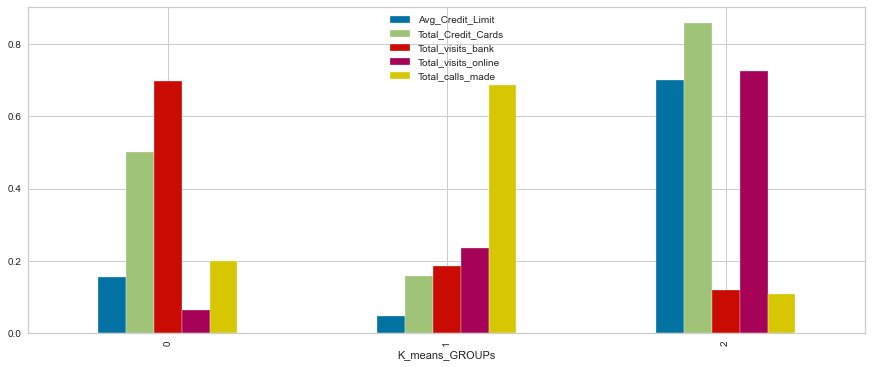

In [11]:
df1scaled.groupby("K_means_GROUPs").mean().plot.bar(figsize=(15, 6))

<font color=blue>
    
 - **Cluster 0**:
    - Avg_Credit_Limit is low to moderate: 5000 to 100000
    - Total_Credit_Cards is low to medium
    - Total_visits_bank is high to very high
    - Total_visits_online is very low to low
    - Total_calls_made is low to moderate
 - **Cluster 1**:
    - Avg_Credit_Limit is very low to low: 3000 to 50000
    - Total_Credit_Cards is very low to low
    - Total_visits_bank is low to moderate
    - Total_visits_online is low to moderate
    - Total_calls_made is high to very high
 - **Cluster 2**:
    - Avg_Credit_Limit is high to very high: 84000 to 200000
    - Total_Credit_Cards is high to very high
    - Total_visits_bank is low to very low
    - Total_visits_online is high to very high
    - Total_calls_made very low to low.

## <span style='color:red'> Step 6: Hierarchical Clustering

In [ ]:
df2.head()

In [ ]:
df2scaled.head() 

### Cophenetic correlation for various distances and linkages 

In [ ]:
# list of distance metrics
distance_metrics = ["chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df2scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df2scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

### Cophenetic correlation for different linkage methods with Euclidean distance

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df2scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df2scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

### Dendrograms for the different linkage methods with different distances 

In [ ]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df2scaled, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(df2scaled))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

### Dendrograms for the different linkage methods with Euclidean distance 

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df2scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df2scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method-
#different example
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

<font color = blue>
    
- From the cophenetic correlation list and Dendrograms the Cityblock method and average linkage is chosen.
    
- After working out it is found that Euclidean method average link is also giving the same cluster profile.

### AgglomerativeClustering with finalized linkage, cluster number

In [14]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="Cityblock", linkage="average")
HCmodel.fit(df2scaled)

AgglomerativeClustering(affinity='Cityblock', linkage='average', n_clusters=3)

In [15]:
df22=df2.copy()
df22scaled=df2scaled.copy()

In [16]:
df22scaled["HC_Clusters"] = HCmodel.labels_
df22["HC_Clusters"] = HCmodel.labels_

In [17]:
df22.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,2
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


In [18]:
df22scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,0.492386,0.111111,0.2,0.066667,0.0,0
1,0.238579,0.222222,0.0,0.666667,0.9,0
2,0.238579,0.666667,0.2,0.200000,0.4,2
3,0.137056,0.444444,0.2,0.066667,0.4,0
4,0.492386,0.555556,0.0,0.800000,0.3,1


### **Cluster Profile - Hierarchical **

In [19]:
cluster_profile22 = df22.groupby("HC_Clusters").mean()

# let's display cluster profiles
cluster_profile22.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HC_Clusters,,,,,
0,12637.554585,2.449782,0.947598,3.493450,6.790393
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,33787.401575,5.532808,3.514436,0.984252,1.984252


In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original data variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df22.iloc[:, counter], x=df22["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled data variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],  y=df22scaled.iloc[:, counter], x=df22scaled["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
# let's see the Attibutes in each cluster
for cl in df22["HC_Clusters"].unique():
    print("Cluster", cl, ":")
    print("-" * 9, "\n")
    print("The Total_Credit_Cards",
                    df22[df22["HC_Clusters"] == cl]["Total_Credit_Cards"].unique())
    print("Total_visits_bank",
                    df22[df22["HC_Clusters"] == cl]["Total_visits_bank"].unique())
    print("Total_calls_made",
                    df22[df22["HC_Clusters"] == cl]["Total_calls_made"].unique())
    print("Total_visits_online",
                    df22[df22["HC_Clusters"] == cl]["Total_visits_online"].unique())
    print("Avg_Credit_Limit",
                    df22[df22["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print("-" * 90, "\n")

<AxesSubplot:xlabel='HC_Clusters'>

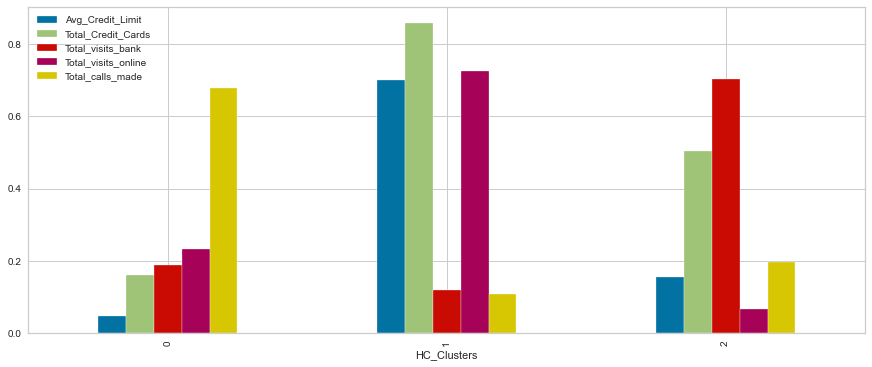

In [20]:
df22scaled.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

<font color=blue>
    
  - **Cluster 0**:
    - Avg_Credit_Limit is very low to low: 3000 to 50000
    - Total_Credit_Cards is very low to low
    - Total_visits_bank is low to moderate
    - Total_visits_online is low to moderate
    - Total_calls_made is high to very high
    
  - **Cluster 1**:
    - Avg_Credit_Limit is high to very high: 84000 to 200000
    - Total_Credit_Cards is high to very high
    - Total_visits_bank is low to very low
    - Total_visits_online is high to very high
    - Total_calls_made very low to low.
 
  - **Cluster 2**:
    - Avg_Credit_Limit is low to moderate: 5000 to 100000
    - Total_Credit_Cards is low to medium
    - Total_visits_bank is high to very high
    - Total_visits_online is low to very low
    - Total_calls_made is low to moderate
 


## <span style='color:red'> Step 7: K-means vs Hierarchical Clustering

In [21]:
# PCA is used to reduce the data to two dimensions
# and the clusters are visualized for K Means and Hierachical

# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(df2scaled)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [22]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.8418992195965997

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

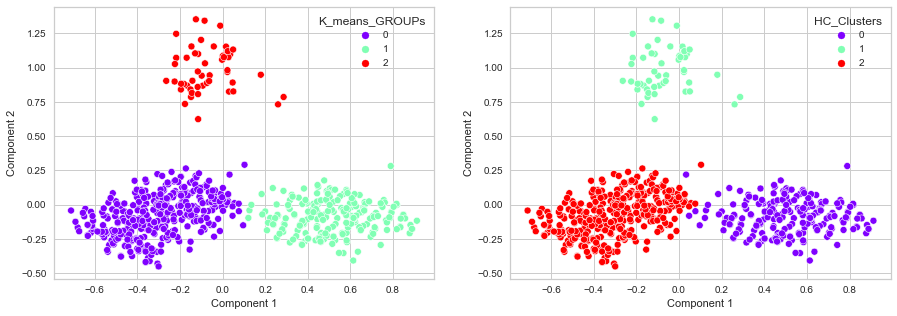

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1);
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["K_means_GROUPs"],
    palette="rainbow",
)
plt.subplot(1,2,2);
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df22["HC_Clusters"],
    palette="rainbow",
)

In [26]:
pd.concat([cluster_profile, cluster_profile22])

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,33792.207792,5.516883,3.496104,0.981818,1.994805
1,12253.333333,2.422222,0.933333,3.542222,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000
0,12637.554585,2.449782,0.947598,3.493450,6.790393
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,33787.401575,5.532808,3.514436,0.984252,1.984252


<AxesSubplot:xlabel='K_means_GROUPs', ylabel='Total_calls_made'>

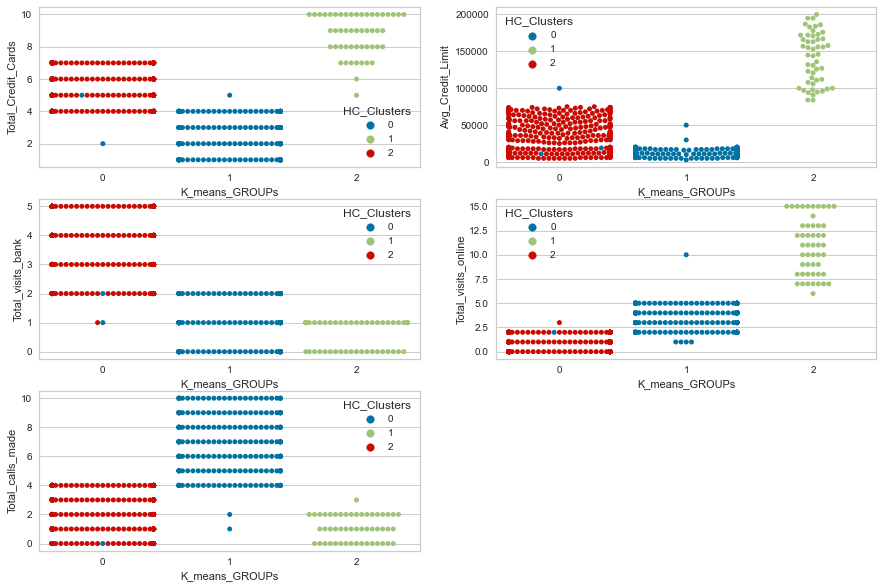

In [27]:
plt.figure(figsize=(15, 10))
plt.subplot(3,2,1); sns.swarmplot(y=df1['Total_Credit_Cards'], x=df1["K_means_GROUPs"], hue= df22["HC_Clusters"])
plt.subplot(3,2,2); sns.swarmplot(y=df1['Avg_Credit_Limit'], x=df1["K_means_GROUPs"], hue= df22["HC_Clusters"])
plt.subplot(3,2,3); sns.swarmplot(y=df1['Total_visits_bank'], x=df1["K_means_GROUPs"], hue= df22["HC_Clusters"])
plt.subplot(3,2,4); sns.swarmplot(y=df1['Total_visits_online'], x=df1["K_means_GROUPs"], hue= df22["HC_Clusters"])
plt.subplot(3,2,5); sns.swarmplot(y=df1['Total_calls_made'], x=df1["K_means_GROUPs"], hue= df22["HC_Clusters"])

<font color=blue>
    When comparing from the cluster profile plots, mean value and the sarm plots for individual varibale, it is found that the K-Means and Hierarchical methods produces similar clustering but named with different cluster numbers. The cluster profile is almost matching. From the swarm plots it can be noted that very few data points are mismatching which can be neglected. Therefore it is concluded that both methods are producing the same cluster profiles. 

## <span style='color:red'> Step 8: Observations & Conclusions

#### <span style='color: red'> Observations:

<font color=green>

    
  From the customer data:
- Avg_Credit_Limit is increasing with Total_Credit_Cards.
    
- Total_visits_bank is negatively correlated with Total_visits_online, Total_calls_made and         Avg_Credit_Limit.
- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online.
  Total_Credit_Cards is positively correlated with Avg_Credit_Limit, Total_visits_bank and         Total_visits_online.
    
- Total_Credit_Cards 4,5,6 or 7 holders are the major contributing customers and the most bank     visited, the least online visited and total call made - medium number of times.
- Higher Total_Credit_Cards holders did least visit to the bank, highest online visiters and they   have low - Total_calls_made.


  From Models: 
    
- Clustering is done with and without the Outliers treatment. The results obtained are same.
- The appropriate k value found is 3.
- The cluster profile is same for Hierarchical and KMeans clustering.

#### <span style='color: red'>  Conclusions and Recommmendations:

<font color=green>
    
Conclusions

1. The appropriate value of k is 3. 
  
    - **Cluster 0**:
    - Avg_Credit_Limit is very low to low: 3000 to 50000
    - Total_Credit_Cards is very low to low
    - Total_visits_bank is low to moderate
    - Total_visits_online is low to moderate
    - Total_calls_made is high to very high
    
  - **Cluster 1**:
    - Avg_Credit_Limit is high to very high: 84000 to 200000
    - Total_Credit_Cards is high to very high
    - Total_visits_bank is very low to low
    - Total_visits_online is high to very high
    - Total_calls_made very low to low.
 
  - **Cluster 2**:
    - Avg_Credit_Limit is low to moderate: 5000 to 100000
    - Total_Credit_Cards is low to medium
    - Total_visits_bank is high to very high
    - Total_visits_online is low to very low
    - Total_calls_made is low to moderate
    
Recommmendations:

1. The majority cusotmer base who has moderate number of credit cards can be focussed for            upselling. 
2. High income (higher average credit limit) people can be targeted as new customers such people    do higher number of online visits, hence campaigning can be done in digital platforms.
4. For this bank the major customer base does higher number of bank visit. Active feedback          systems should be implemented. Margetting team should be deployed to reach out to these          customers to upsell the cards. Loyal-Customer offers can be implemented.    
5. Providing a comparision to pear products in the market.
6. Promoting cash back rewards on spending.
7. Offering secured mobile payment capability, co-branded retail cards with brand incentive.

# <span style='color:red'>  Appendix: Clustering after Outlier Treatment

## <span style='color:red'>  K-Means Clustering - with treated outlier 

In [28]:
df1out.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [29]:
scaler = MinMaxScaler()
df1outscaled = scaler.fit_transform(df1out)

In [30]:
# Creating a dataframe from the scaled data
df1outscaled = pd.DataFrame(df1outscaled, columns=df1out.columns)

In [31]:
df2outscaled = df1outscaled.copy()
df1outscaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.678322,0.111111,0.2,0.066667,0.0
1,0.328671,0.222222,0.0,0.666667,0.9
2,0.328671,0.666667,0.2,0.200000,0.4
3,0.188811,0.444444,0.2,0.066667,0.4
4,0.678322,0.555556,0.0,0.800000,0.3


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

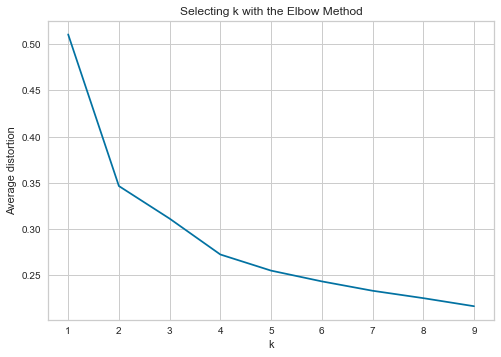

In [32]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df1outscaled)
    prediction=model.predict(df1outscaled)
    meanDistortions.append(sum(np.min(cdist(df1outscaled, model.cluster_centers_, 'euclidean'), axis=1)) / df1outscaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**The appropriate value of k from the elbow curve seems to be 2 or 4.**

### **The silhouette scores.**

For n_clusters = 2, silhouette score is 0.46760984797866534
For n_clusters = 3, silhouette score is 0.5126748379073286
For n_clusters = 4, silhouette score is 0.38326183157204297
For n_clusters = 5, silhouette score is 0.3058088406250661
For n_clusters = 6, silhouette score is 0.2734238505921848
For n_clusters = 7, silhouette score is 0.2546316087530883
For n_clusters = 8, silhouette score is 0.2499922562968939
For n_clusters = 9, silhouette score is 0.24736524352950595


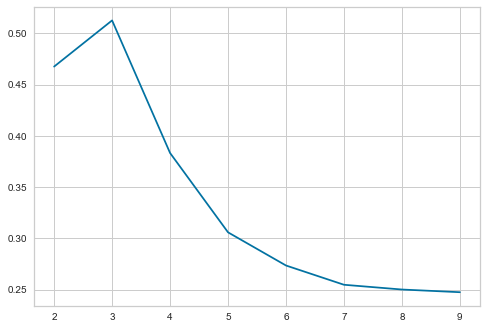

In [33]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df1outscaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df1outscaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

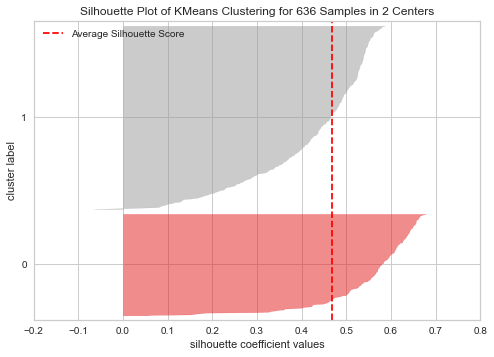

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 636 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# finding optimal no. of clusters with silhouette coefficients-- KMeans=2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(df1outscaled)
visualizer.show()

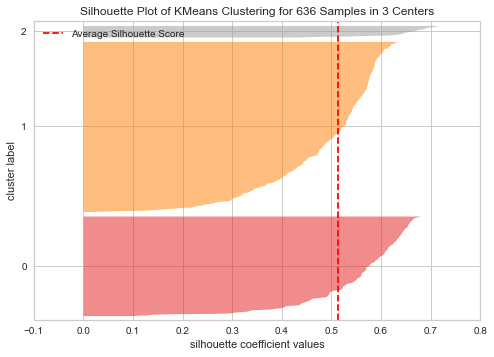

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 636 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
# finding optimal no. of clusters with silhouette coefficients -- KMeans=3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df1outscaled)
visualizer.show()

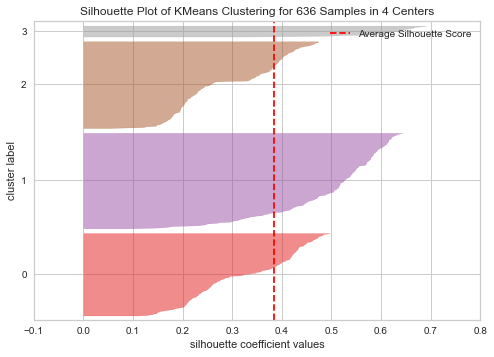

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 636 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
# finding optimal no. of clusters with silhouette coefficients -- KMeans=4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df1outscaled)
visualizer.show()

### K-Means CLUSTERING ALGORITHM with appropriate K value

In [52]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1outscaled)

# adding kmeans cluster labels to the original and scaled dataframes
df1out["K_means_GROUPs"] = kmeans.labels_
df1outscaled["K_means_GROUPs"] = kmeans.labels_

df1out.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_GROUPs
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,1
4,100000,6,0,12,3,1


### **Cluster Profile - KMeans**

In [53]:
cluster_profile = df1out.groupby("K_means_GROUPs").mean()

# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_GROUPs,,,,,
0,38459.657702,5.731051,3.330073,1.559902,1.943765
1,13026.431718,2.449339,0.925110,3.612335,6.819383


In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original data variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df1.iloc[:, counter], x=df1out["K_means_GROUPs"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled data variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],  y=df1outscaled.iloc[:, counter], x=df1outscaled["K_means_GROUPs"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
# let's see the Attibutes in each cluster
for cl in df1out["K_means_GROUPs"].unique():
    print("Cluster", cl, ":")
    print("-" * 9, "\n")
    print("The Total_Credit_Cards",
                    df1out[df1out["K_means_GROUPs"] == cl]["Total_Credit_Cards"].unique())
    print("Total_visits_bank",
                    df1out[df1out["K_means_GROUPs"] == cl]["Total_visits_bank"].unique())
    print("Total_calls_made",
                    df1out[df1out["K_means_GROUPs"] == cl]["Total_calls_made"].unique())
    print("Total_visits_online",
                    df1out[df1out["K_means_GROUPs"] == cl]["Total_visits_online"].unique())
    print("Avg_Credit_Limit",
                    df1out[df1out["K_means_GROUPs"] == cl]["Avg_Credit_Limit"].unique())
    print("-" * 90, "\n")

<AxesSubplot:xlabel='K_means_GROUPs'>

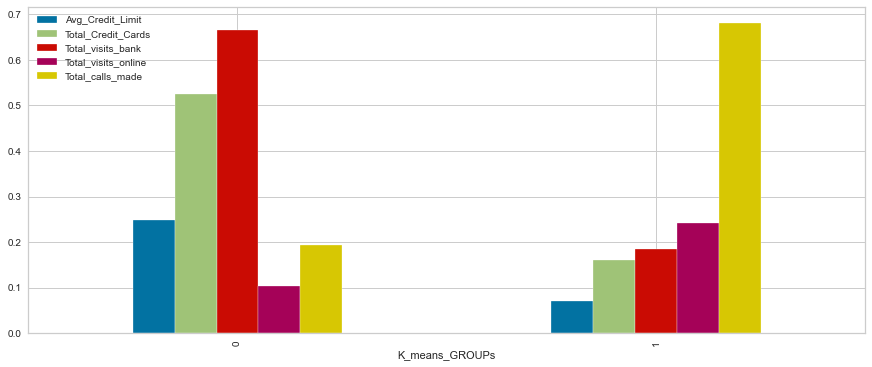

In [54]:
df1outscaled.groupby("K_means_GROUPs").mean().plot.bar(figsize=(15, 6))

## <span style='color:red'>  Hierarchical Clustering - with treated outlier 

In [37]:
df2out.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [38]:
df2outscaled.head() 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.678322,0.111111,0.2,0.066667,0.0
1,0.328671,0.222222,0.0,0.666667,0.9
2,0.328671,0.666667,0.2,0.200000,0.4
3,0.188811,0.444444,0.2,0.066667,0.4
4,0.678322,0.555556,0.0,0.800000,0.3


### Cophenetic correlation for various distances and linkages 

In [39]:
# list of distance metrics
distance_metrics = ["chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df2outscaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df2outscaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Chebyshev distance and single linkage is 0.5453509072728373.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6198717666382926.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8312267254798342.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7875668054379226.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.46366736783531204.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.53847730079616.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6612009803561423.
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.6510502863084224.
Cophenetic correlation for Cityblock distance and single linkage is 0.4927093104444637.
Cophenetic correlation for Cityblock distance and complete linkage is 0.823134989771371.
Cophenetic correlation for Cityblock distance and average linkage is 0.841397598429296.
Cophenetic cor

In [40]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.841397598429296, which is obtained with Cityblock distance and average linkage.


### Cophenetic correlation for different linkage methods with Euclidean distance

In [41]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df2outscaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df2outscaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.5683890332561308.
Cophenetic correlation for complete linkage is 0.8024349281043546.
Cophenetic correlation for average linkage is 0.83786899826578.
Cophenetic correlation for centroid linkage is 0.8363209720332562.
Cophenetic correlation for ward linkage is 0.7342962639863907.
Cophenetic correlation for weighted linkage is 0.8063612287287608.


In [42]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.83786899826578, which is obtained with average linkage.


### Dendrograms for the different linkage methods with different distances 

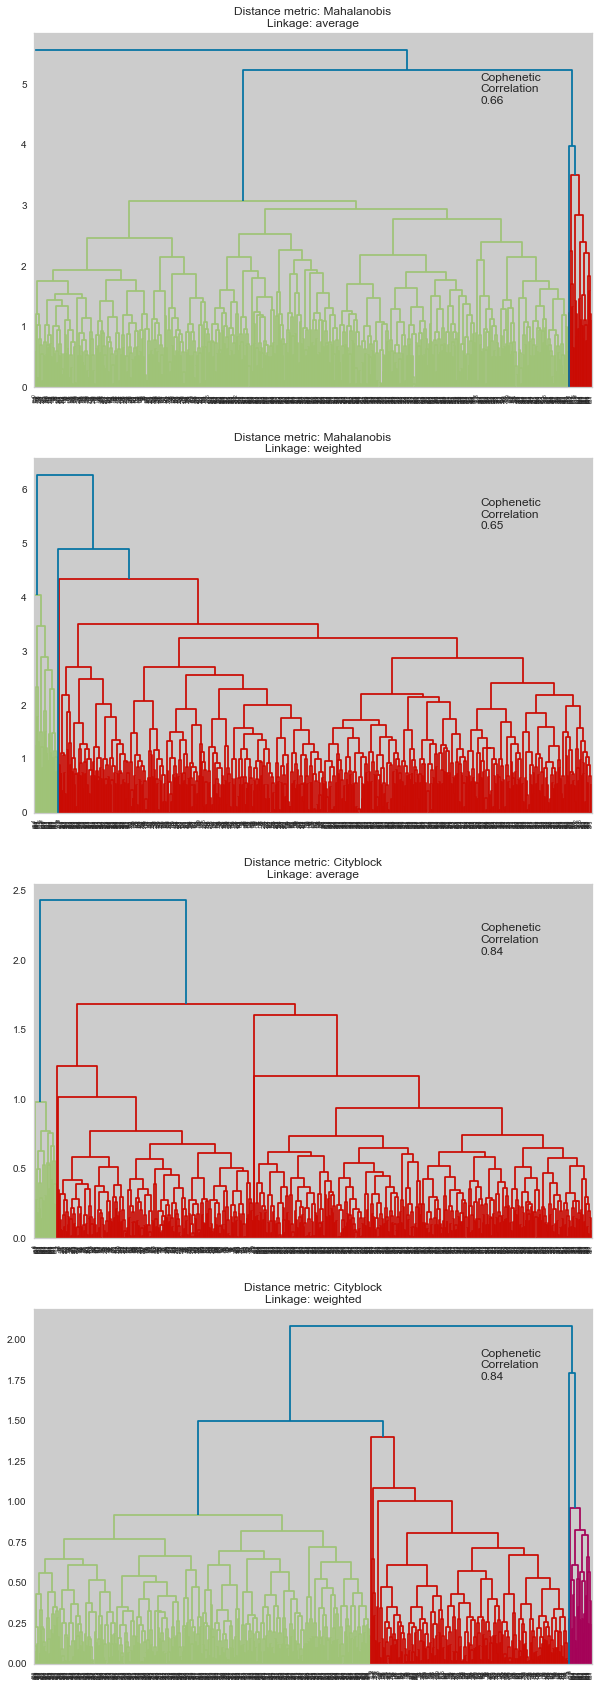

In [43]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df2outscaled, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(df2outscaled))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

### Dendrograms for the different linkage methods with Euclidean distance 

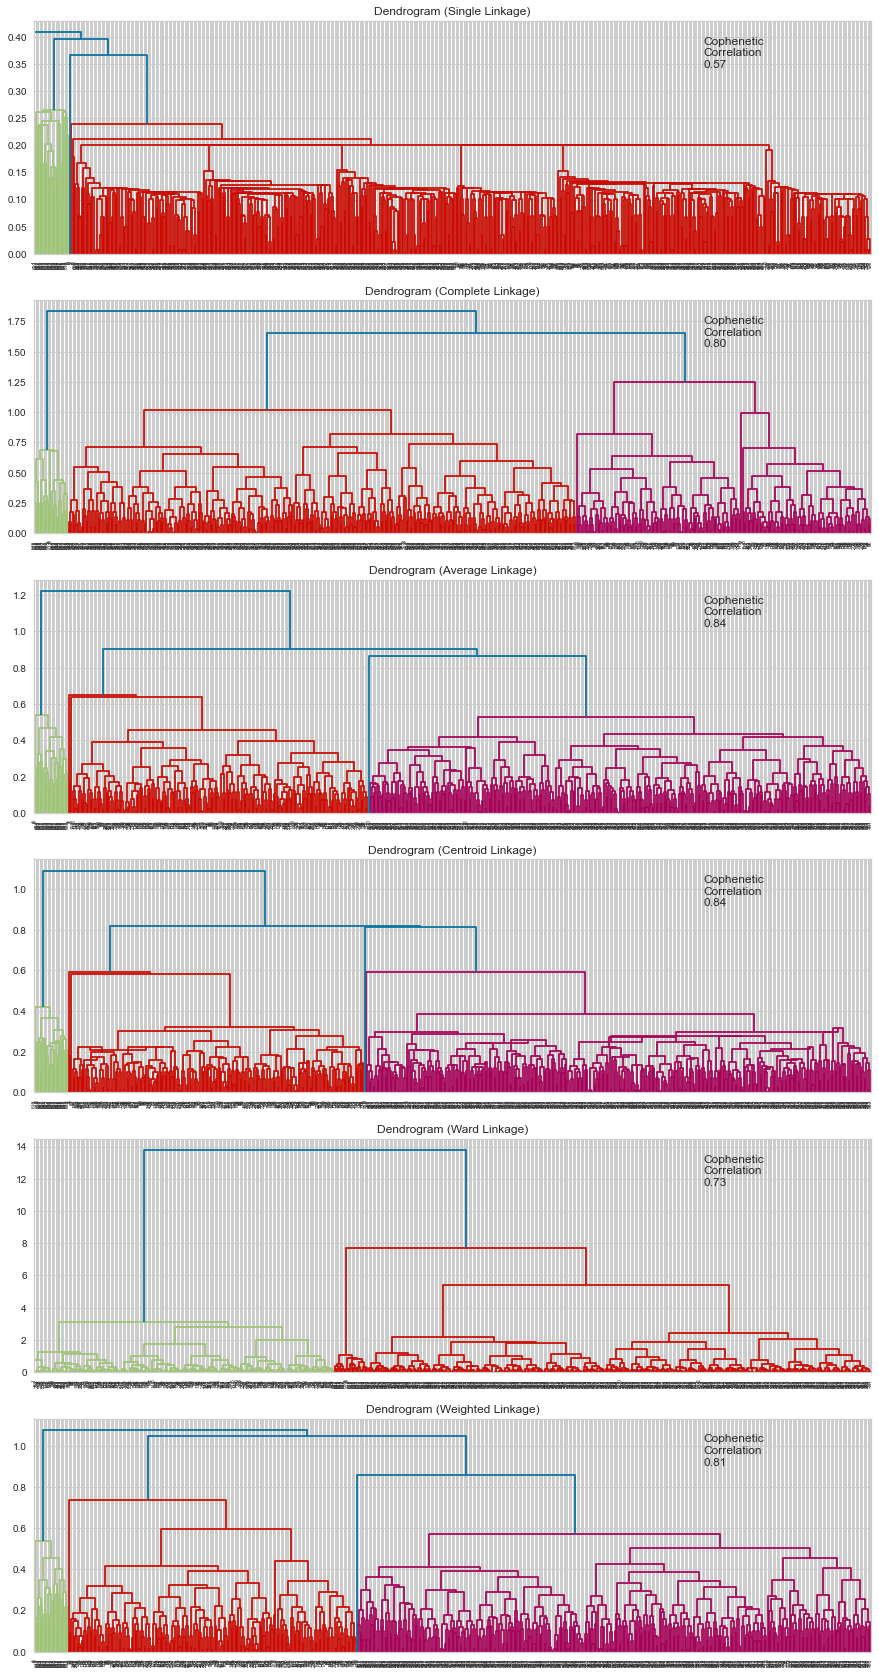

In [44]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df2outscaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df2outscaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

### AgglomerativeClustering with finalized linkage, cluster number

In [45]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="Euclidean", linkage="complete")
HCmodel.fit(df2outscaled)

AgglomerativeClustering(affinity='Euclidean', linkage='complete', n_clusters=3)

In [46]:
df22out=df2out.copy()
df22outscaled=df2outscaled.copy()

In [47]:
df22outscaled["HC_Clusters"] = HCmodel.labels_
df22out["HC_Clusters"] = HCmodel.labels_

In [48]:
df22out.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,1


In [49]:
df22outscaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,0.678322,0.111111,0.2,0.066667,0.0,0
1,0.328671,0.222222,0.0,0.666667,0.9,0
2,0.328671,0.666667,0.2,0.200000,0.4,2
3,0.188811,0.444444,0.2,0.066667,0.4,2
4,0.678322,0.555556,0.0,0.800000,0.3,1


### **Cluster Profile - Hierarchical **

In [50]:
cluster_profile22out = df22out.groupby("HC_Clusters").mean()

# let's display cluster profiles
cluster_profile22out.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
HC_Clusters,,,,,
0,12589.285714,2.401786,0.928571,3.549107,6.852679
1,112307.692308,8.884615,0.615385,10.884615,1.230769
2,33541.450777,5.520725,3.492228,0.984456,2.010363


In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original data variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df22out.iloc[:, counter], x=df22out["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled data variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],  y=df22outscaled.iloc[:, counter], x=df22outscaled["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
# let's see the Attibutes in each cluster
for cl in df22out["HC_Clusters"].unique():
    print("Cluster", cl, ":")
    print("-" * 9, "\n")
    print("The Total_Credit_Cards",
                    df22out[df22out["HC_Clusters"] == cl]["Total_Credit_Cards"].unique())
    print("Total_visits_bank",
                    df22out[df22out["HC_Clusters"] == cl]["Total_visits_bank"].unique())
    print("Total_calls_made",
                    df22out[df22out["HC_Clusters"] == cl]["Total_calls_made"].unique())
    print("Total_visits_online",
                    df22out[df22out["HC_Clusters"] == cl]["Total_visits_online"].unique())
    print("Avg_Credit_Limit",
                    df22out[df22out["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print("-" * 90, "\n")

<AxesSubplot:xlabel='HC_Clusters'>

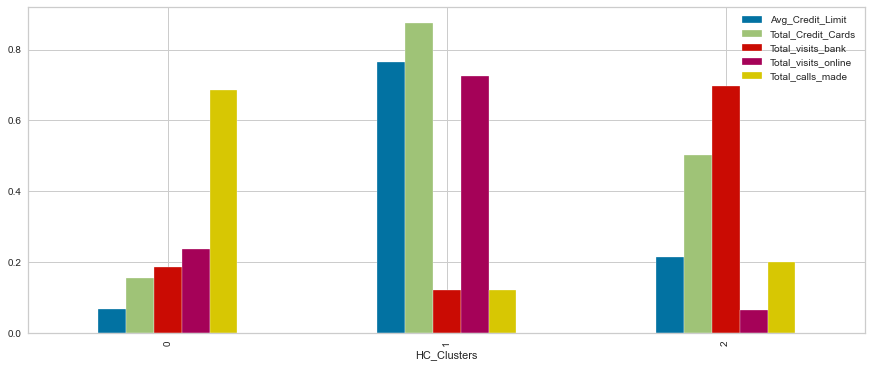

In [51]:
df22outscaled.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

In [55]:
# PCA is used to reduce the data to two dimensions
# and the clusters are visualized for K Means and Hierachical

# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(df2scaled)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [56]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.8418992195966004

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

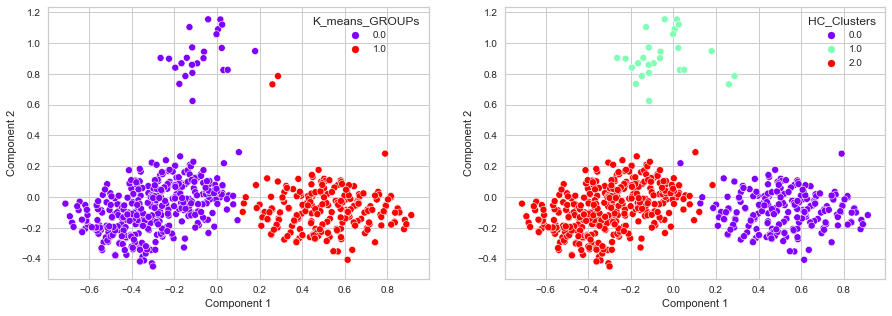

In [59]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1);
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1out["K_means_GROUPs"],
    palette="rainbow",
)
plt.subplot(1,2,2);
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df22out["HC_Clusters"],
    palette="rainbow",
)